# **Project Name**    - Online retail customer segmentation (ML Case Study)




##### **Project Type** : Unsupervised Learning
##### **Contributor** : Individual
##### **Name** : Akash Kundu


# **Project Summary -**

The aim of this machine learning project is to perform customer segmentation for an online retail business. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics, behaviors, or preferences. By effectively segmenting customers, businesses can gain valuable insights and tailor their marketing strategies to specific customer groups, leading to improved customer satisfaction and increased profitability.
Dataset: The project utilizes a dataset containing relevant information about the online retail customers. The dataset includes features such as customer demographics, purchase history, frequency of purchases, monetary value of purchases, and other relevant variables that can help in segmenting customers effectively.
Objective: The primary objective of this project is to apply machine learning techniques to segment the online retail customers into meaningful groups based on their purchasing behavior and characteristics. This segmentation will help the business to better understand its customer base, identify patterns and trends, and develop personalized marketing campaigns to target each segment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
#### **Data Description**
##### **Attribute Information:**
* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description:** Product (item) name. Nominal.
* **Quantity:** The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country:** Country name. Nominal, the name of the country where each customer resides.

# ***Let's Begin !***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [2]:
from ast import increment_lineno
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
store_df = pd.read_excel('/content/drive/MyDrive/Summative Assingment/Online_Retail_store.xlsx')

### Dataset First View

In [4]:
# Dataset First Look
store_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
store_df.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### **Observation**
* CustomerID Contain several Null values and also in Description
* InvoiceNo start with C means cancelation. We neet to drop those entries

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
store_df.duplicated().sum()

5268

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
store_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Text(0.5, 1.0, 'Missing Values Visualisation')

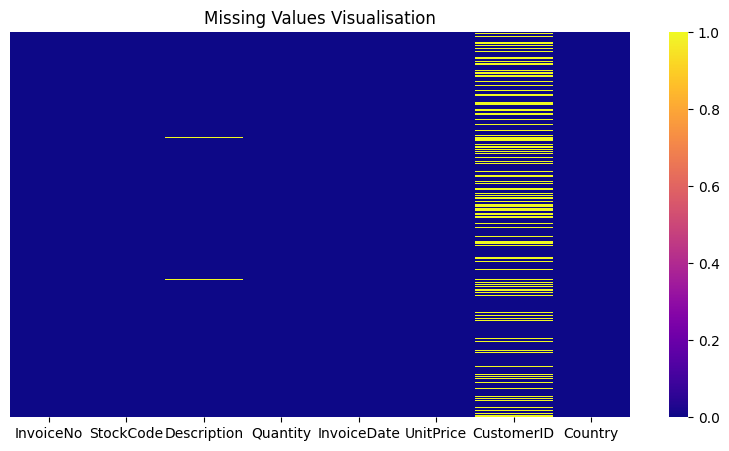

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(store_df.isnull(),cmap='plasma',annot=False, yticklabels=False)
plt.title('Missing Values Visualisation')

#### **Observation**
* Null values present in **CustomerID** and **Description** column.
* **CustomerID** is our important feature for indentification and we can't even fill it beacuse it is a unique field also.
* As we have very sufficient data for the modeling purpose so we can drop these null values.

In [10]:
#Droping Null values from data
store_df.dropna(inplace=True)

In [11]:
#Dataset size after droping null values
store_df.shape

(406829, 8)

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
store_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
# Dataset Description for the numirical variable
store_df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

* Three numerical variable available.
* **Quantity** have negative min value and which also very low
* **UnitPrice** have zero min value

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
store_df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
#Quantity column have negative values which comes with some uncertinity, then after reading the Description column we found out that they are cancel orders so it's better to drop them.
store_df[store_df['Quantity'] < 0]


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [16]:
# convert the datatype of InvoiceNo to str
store_df['InvoiceNo'] = store_df['InvoiceNo'].astype('str')

In [17]:
#Droping those invoce no which starts with C because the are cancel orders.
store_df = store_df[~store_df['InvoiceNo'].str.contains('C')]

In [18]:
#let count the rows which contain the unitprice is 0 and drop them
store_df[store_df['UnitPrice'] == 0].count()

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [19]:
#now selecting the data where unitprice is grater then zero
store_df = store_df[store_df['UnitPrice'] > 0 ]
store_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[397884 rows x 8 columns]

### What all manipulations have you done and insights you found?

* **Quantity** column got negative min value because of order which are canceled.
* select the quantity which is grater then 0.
* **InvoiceNo** contains "C" is the order which are canceled by the customer so we select the Invoice which do not contain that "C".
* We Delete the **UnitPrice** which is zero.

## ***6. Feature Engineering & Data Pre-processing***

In [20]:
#Extracting month and day name from these above column
store_df['Month_name'] = store_df['InvoiceDate'].dt.month_name()
store_df['Day_name'] = store_df['InvoiceDate'].dt.day_name()
store_df["Hour"] = store_df["InvoiceDate"].apply(lambda x: x.hour)


In [21]:
#Calculating the Total amount of any customer spent from quantity*unitprice
store_df['TotalAmount'] = store_df['Quantity'] * store_df['UnitPrice']
store_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Month_name  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   

    Day_name  Hour  TotalAmount  
0  Wednesday     8        15.30  
1  Wednesday     8        20.34  
2  Wednesday     8        22.00  
3  Wednesday     8        20.34  
4  Wednesday     8        20.34

## **EDA**

In [22]:
#Searching for Top 10 product
ProductSales = store_df['Description'].value_counts().reset_index().rename(columns={'index' : 'ProductName', 'Description' : 'ProductCount'})
TopProduct = ProductSales.head(10)
TopProduct

ProductName  ProductCount
0  WHITE HANGING HEART T-LIGHT HOLDER          2028
1            REGENCY CAKESTAND 3 TIER          1723
2             JUMBO BAG RED RETROSPOT          1618
3       ASSORTED COLOUR BIRD ORNAMENT          1408
4                       PARTY BUNTING          1396
5             LUNCH BAG RED RETROSPOT          1316
6   SET OF 3 CAKE TINS PANTRY DESIGN           1159
7             LUNCH BAG  BLACK SKULL.          1105
8                             POSTAGE          1099
9     PACK OF 72 RETROSPOT CAKE CASES          1068

Text(0.5, 1.0, 'Top 10 Products')

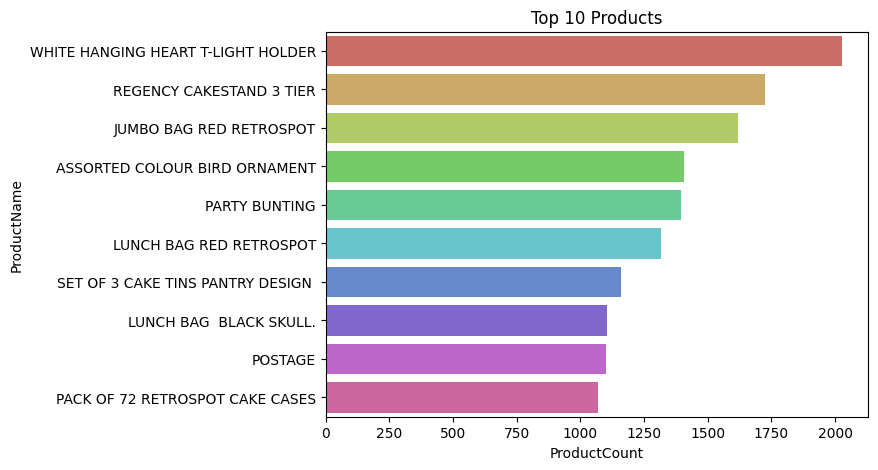

In [23]:
#Visualization for the top products
plt.figure(figsize=(7,5))
sns.barplot(x = TopProduct['ProductCount'], y = TopProduct['ProductName'], palette="hls")
plt.title('Top 10 Products')

* **WHITE HANGING HEART T-LIGHT HOLDER** is the highest selling product with 2028 unit sold.
* Followed by **REGENCY CAKESTAND 3 TIER**

In [24]:
#searching Bottom 10 selling product
BottomProduct = ProductSales.tail(10)
BottomProduct

ProductName  ProductCount
3867  BLUE FELT HANGING HEART WITH FLOWER             1
3868           GLASS CAKE COVER AND PLATE             1
3869           CRACKED GLAZE EARRINGS RED             1
3870              SCALLOP SHELL SOAP DISH             1
3871     NECKLACE+BRACELET SET PINK DAISY             1
3872          RUBY GLASS CLUSTER EARRINGS             1
3873       PINK CHRYSANTHEMUMS ART FLOWER             1
3874      72 CAKE CASES VINTAGE CHRISTMAS             1
3875         WALL ART , THE MAGIC FOREST              1
3876          PAPER CRAFT , LITTLE BIRDIE             1

Text(0.5, 1.0, 'Bottom 10 Selling Products')

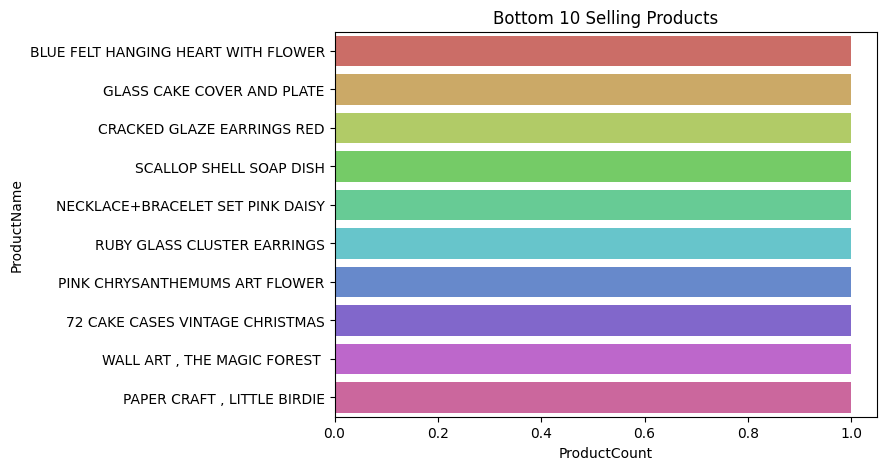

In [25]:
#Visualization for the bottom 10 selling products
plt.figure(figsize=(7,5))
sns.barplot(x = BottomProduct['ProductCount'], y = BottomProduct['ProductName'], palette="hls")
plt.title('Bottom 10 Selling Products')

* **72 CAKE CASES VINTAGE CHRISTMAS	1, WALL ART , THE MAGIC FOREST	1 ,PAPER CRAFT , LITTLE BIRDIE**  are some Bottom selling product with only 1 unit sold.

In [26]:
#Top 10 Product In terms of StockCode
TopStockCode = store_df['StockCode'].value_counts().reset_index().rename(columns={'index' : 'StockCodeName', 'StockCode' : 'StockCodeCount'}).head(10)
TopStockCode

StockCodeName  StockCodeCount
0        85123A            2035
1         22423            1723
2        85099B            1618
3         84879            1408
4         47566            1396
5         20725            1317
6         22720            1159
7         20727            1105
8          POST            1099
9         23203            1098

Text(0.5, 1.0, 'Top 10 StockCode')

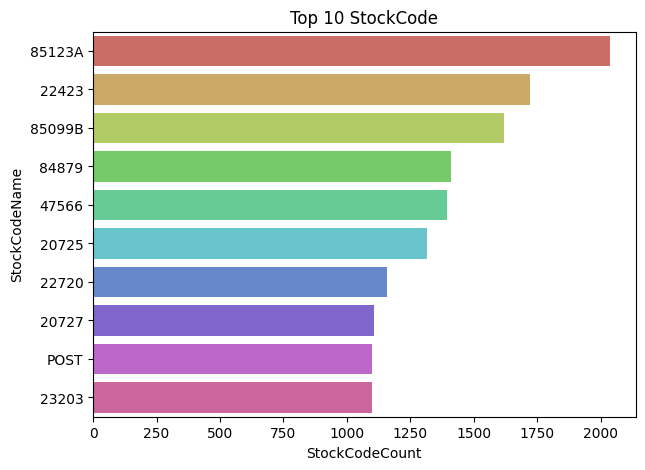

In [27]:
#Visualization for the top 10 StockCode
plt.figure(figsize=(7,5))
sns.barplot(x = TopStockCode['StockCodeCount'], y = TopStockCode['StockCodeName'], palette="hls")
plt.title('Top 10 StockCode')

* Top **StockCode** are **85123A** with 2035 units.
* Followed by **22423, 85099B**.

In [28]:
# Top Purchaser
TopPurchaser = store_df['CustomerID'].value_counts().reset_index().rename(columns={'index' : 'CustomerID', 'CustomerID' : 'PurchaseCount'}).head(10)
TopPurchaser

CustomerID  PurchaseCount
0     17841.0           7847
1     14911.0           5675
2     14096.0           5111
3     12748.0           4595
4     14606.0           2700
5     15311.0           2379
6     14646.0           2076
7     13089.0           1818
8     13263.0           1677
9     14298.0           1637

Text(0.5, 1.0, 'Top 10 Purchaser')

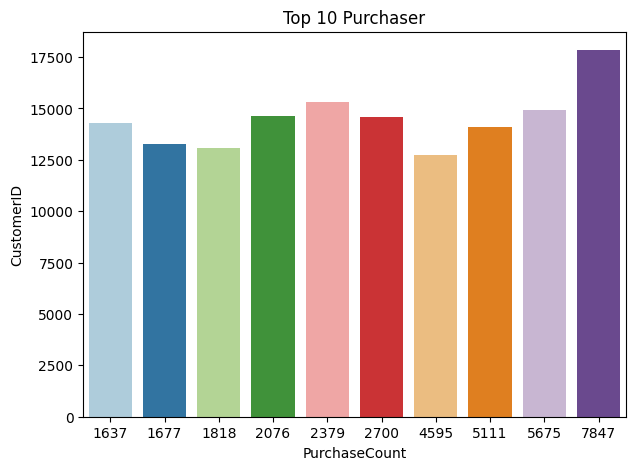

In [29]:
#Visualization for the top 10 Purchaser
plt.figure(figsize=(7,5))
sns.barplot(x = TopPurchaser['PurchaseCount'], y = TopPurchaser['CustomerID'],palette="Paired")
plt.title('Top 10 Purchaser')

* Top Buyer is **17841** with **7847** unit purchased.
* Followed by **14911, 14096**

In [30]:
#Top 5 countries from which most buyer are.
TopBuyerCountry = store_df['Country'].value_counts().reset_index().rename(columns={'index' : 'CountryName', 'Country' : 'CustomerCount'}).head(5)
TopBuyerCountry

CountryName  CustomerCount
0  United Kingdom         354321
1         Germany           9040
2          France           8341
3            EIRE           7236
4           Spain           2484

Text(0.5, 1.0, 'Top 5 Buyer Cuntries')

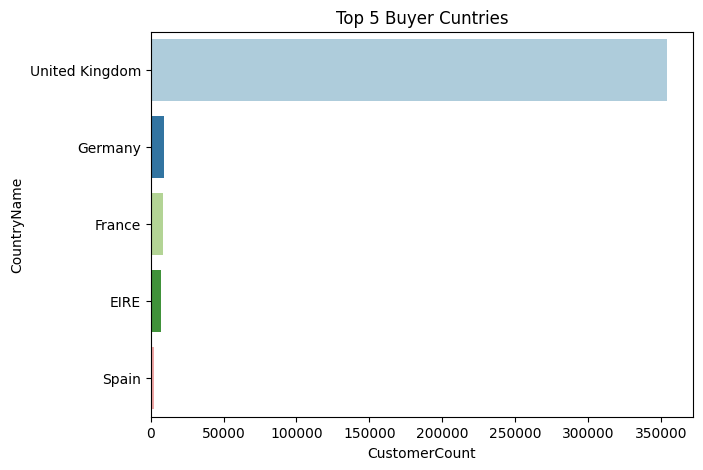

In [31]:
#Visualization for the top Top 5 countries from which most buyer are.
plt.figure(figsize=(7,5))
sns.barplot(x = TopBuyerCountry['CustomerCount'], y = TopBuyerCountry['CountryName'],palette="Paired")
plt.title('Top 5 Buyer Cuntries')

* Nearly 80% of customer are from **United Kingdom** Followed by **Germany and France**.

In [32]:
# Sales Count According to the month
MonthlySales = store_df['Month_name'].value_counts().reset_index().rename(columns={'index' : 'Month_name', 'Month_name' : 'MonthSalesCount'})
MonthlySales

Month_name  MonthSalesCount
0    November            64531
1     October            49554
2    December            43461
3   September            40028
4         May            28320
5        June            27185
6       March            27175
7      August            27007
8        July            26825
9       April            22642
10    January            21229
11   February            19927

Text(0.5, 1.0, 'Monthly Sales')

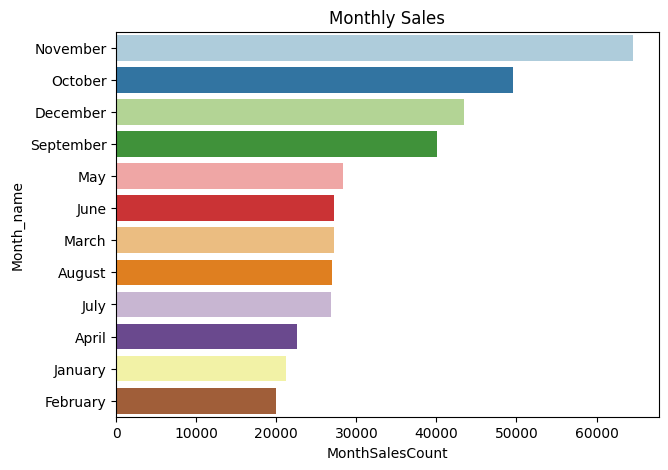

In [33]:
#Visualization for the Monthly Sales.
plt.figure(figsize=(7,5))
sns.barplot(x = MonthlySales['MonthSalesCount'], y = MonthlySales['Month_name'],palette="Paired")
plt.title('Monthly Sales')

* **November** is the month in which maximum sales happen count to **64531**.
* Followed by **Octuber, December**

In [34]:
# Day Wise Sales count.
DaySales = store_df['Day_name'].value_counts().reset_index().rename(columns={'index' : 'Day_name', 'Day_name' : 'DaySalesCount'})
DaySales

Day_name  DaySalesCount
0   Thursday          80035
1  Wednesday          68885
2    Tuesday          66473
3     Monday          64893
4     Sunday          62773
5     Friday          54825

Text(0.5, 1.0, 'Day Wise Sales')

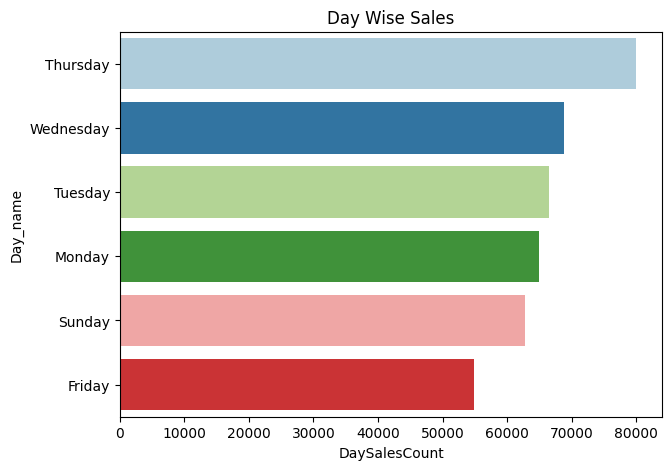

In [35]:
#Visualization for the Day wise Sales.
plt.figure(figsize=(7,5))
sns.barplot(x = DaySales['DaySalesCount'], y = DaySales['Day_name'],palette="Paired")
plt.title('Day Wise Sales')

* **Thrusday** is the day of week where maximum number of sales take place accounted **80035**, Followed by **Wednesday, Tuesday**.

In [36]:
#Unique values in hour
store_df['Hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [37]:
# Day time divide into fraction of time
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [38]:
#fit this into data
store_df['Day_fractions'] = store_df['Hour'].apply(time)

In [39]:
# sales count according to the fraction of the time
TimeSales = store_df['Day_fractions'].value_counts().reset_index().rename(columns={'index' : 'Day_fractions', 'Day_fractions' : 'fractionSalesCount'})
TimeSales

Day_fractions  fractionSalesCount
0     Afternoon              272738
1       Morning              118095
2       Evening                7051

Text(0.5, 1.0, 'Day Fraction Wise Sales')

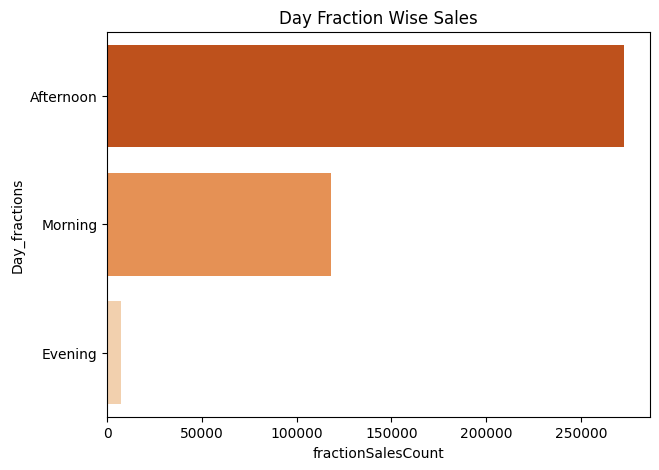

In [40]:
#Visualization for the sales count according to the fraction of the time.
plt.figure(figsize=(7,5))
sns.barplot(x = TimeSales['fractionSalesCount'], y = TimeSales['Day_fractions'],palette="Oranges_r")
plt.title('Day Fraction Wise Sales')

* As we see Store oprates between **6 a.m to 8 p.m**
* **Afternoon** is the day time when maximum number of sales happen.

In [41]:
#Top Customer in Average ammount spent .
AverageAmount = store_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns = {'TotalAmount' : 'AverageAmountSpent'}).head(10)
AverageAmount

CustomerID  AverageAmountSpent
0     12346.0        77183.600000
1     12347.0           23.681319
2     12348.0           57.975484
3     12349.0           24.076027
4     12350.0           19.670588
5     12352.0           29.482824
6     12353.0           22.250000
7     12354.0           18.610345
8     12355.0           35.338462
9     12356.0           47.651356

Text(0.5, 1.0, 'Day Fraction Wise Sales')

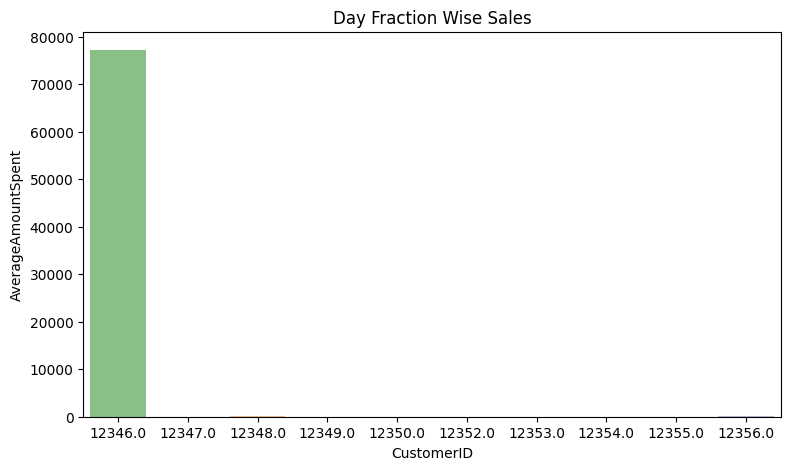

In [42]:
#Visualization for the Top Customer in Average ammount spent.
plt.figure(figsize=(9,5))
sns.barplot(x = AverageAmount['CustomerID'], y = AverageAmount['AverageAmountSpent'],palette="Accent")
plt.title('Day Fraction Wise Sales')

* Maximum Amount by a customer is with customerID **12346** which amounted **77183**.

# **Model Building / Traning**

### **RFM Analysis**

### **What is RFM?**
**RFM (Recency, Frequency, Monetary)** analysis is a widely used customer segmentation technique in marketing and analytics. It helps businesses understand and categorize their customers based on three key factors:

* How recently they made a purchase **(Recency)**,
* How frequently they make purchases **(Frequency)**,
* How much they spend **(Monetary value)**.

RFM analysis enables businesses to identify and target different customer segments with customized marketing approaches.

### **Why it is Needed?**
RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors Recency, Frequency, and Monetary.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

In [43]:
RFM_df = store_df.copy()
RFM_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Month_name  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   December   

    Day_name  Hour  TotalAmount Day_fractions  
0  Wednesday     8        15.30       Morning  
1  Wednesday     8        20.34       Morning  
2  Wednesday     8        22.00       Morning  
3  Wednesday     8        20.34       Morning  
4  Wednesday     8        20.34       Morning

In [44]:
#Recency = Latest Date - Last Inovice Data
#Frequency = count of invoice no. of transaction(s),
#Monetary = Sum of Total Amount for each customer

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFM_df = store_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFM_df['InvoiceDate'] = RFM_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFM_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

RFM_df.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [45]:
# Descriptive statistics for Recency, Frequency, Monetary
print(RFM_df['Recency'].describe())
print('-------------------------------------------------------')
print(RFM_df['Frequency'].describe())
print('-------------------------------------------------------')
print(RFM_df['Monetary'].describe())

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64
-------------------------------------------------------
count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64
-------------------------------------------------------
count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64


Text(0.5, 1.0, 'Distribution of Recency')

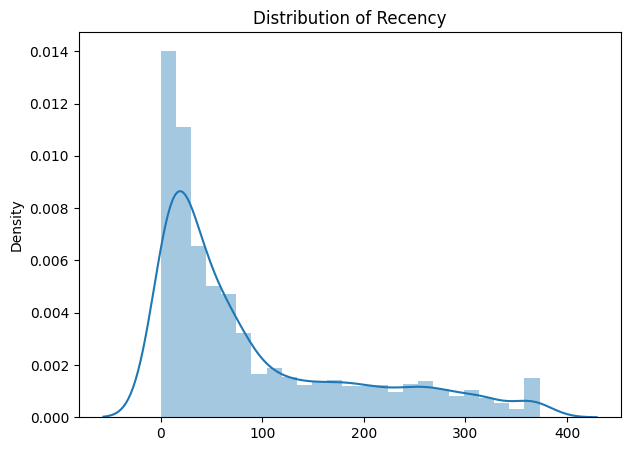

In [46]:
# Visualaisation of Descriptive statistics for Recency, Frequency, Monetary
plt.figure(figsize=(7,5))
sns.distplot(x = RFM_df['Recency'])
plt.title('Distribution of Recency')

* **Recency** Plot is **Right skewed** which means their is only positive values available.

Text(0.5, 1.0, 'Distribution of Frequency')

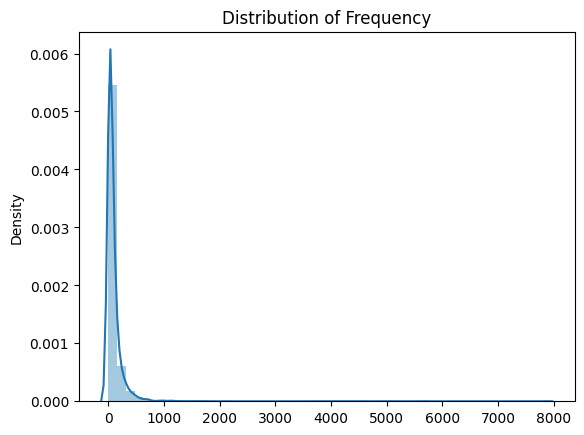

In [47]:
sns.distplot(x = RFM_df['Frequency'])
plt.title('Distribution of Frequency')

* **Frequency** Plot is **Right skewed** which means their is only positive values available.

Text(0.5, 1.0, 'Distribution of Monetary')

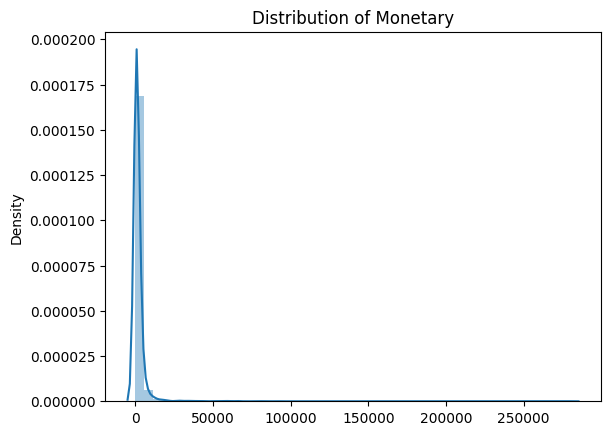

In [48]:
sns.distplot(x = RFM_df['Monetary'])
plt.title('Distribution of Monetary')

* **Monetary** Plot is **Right skewed** which means their is only positive values available.

In [49]:
# Split the data into four segment using Quantile
quantile = RFM_df.quantile(q = [0.25,0.50,0.75])
quantile.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [50]:
# arguments (x = value, v = recency, monetary_value, frequency, Q = quartiles dict)
# lower the recency, good for the company

def Rscoring(x,v,Q):
    if x <= Q[v][0.25]:
        return 1
    elif x <= Q[v][0.50]:
        return 2
    elif x <= Q[v][0.75]:
        return 3
    else:
        return 4

# arguments (x = value, v = recency, monetary_value, frequency, Q = quartiles dict)
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.

def FMscoring(x,v,Q):
    if x <= Q[v][0.25]:
        return 4
    elif x <= Q[v][0.50]:
        return 3
    elif x <= Q[v][0.75]:
        return 2
    else:
        return 1
# # this code was for understanding the above code function
# if 18 <= quantile['Recency'][0.25]:
#   print(1)
# else:
#   print('Great')

In [51]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
RFM_df["R"] = RFM_df['Recency'].apply(Rscoring,args=('Recency',quantile,))
RFM_df["F"] = RFM_df['Frequency'].apply(FMscoring,args=('Frequency',quantile,))
RFM_df["M"] = RFM_df['Monetary'].apply(FMscoring,args=('Monetary',quantile,))
RFM_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [52]:
# Add a new column to combine RFM score
RFM_df['RFM_Group'] = RFM_df.R.map(str)+RFM_df.F.map(str)+RFM_df.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFM_Score'] = RFM_df[['R', 'F', 'M']].sum(axis = 1)
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  3       443         11

In [53]:
#Data information
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [54]:
#Find unique values in RFM score
RFM_df['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [55]:
#Give a type a customer according to the RFM score finding for the each customer
CustomerType = ['Platinaum','Gold','Silver','Bronz']

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles
ScoreBucket = pd.qcut(RFM_df['RFM_Score'], q=4, labels=CustomerType)
RFM_df['RMFCustomerType'] = ScoreBucket.values
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  
CustomerID                  
12346.0             Silver  
12347.0          Platinaum  
12348.0               Gold  
12349.0          Platinaum  
12350.0              Bronz

In [56]:
# Validate the data from the RFM_Group with the value 111
RFM_df[RFM_df['RFM_Group'] == '111'].sort_values('Monetary', ascending = False).reset_index().head()

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   

  RMFCustomerType  
0       Platinaum  
1       Platinaum  
2       Platinaum  
3       Platinaum  
4       Platinaum

Text(0.5, 1.0, 'RFM Customer Type Data')

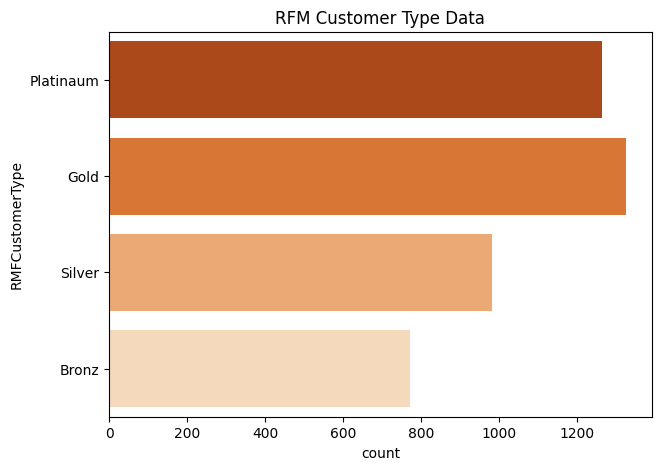

In [57]:
# Visualisation for the CustomerType
plt.figure(figsize = (7,5))
sns.countplot(RFM_df['RMFCustomerType'],palette="Oranges_r")
plt.title('RFM Customer Type Data')

In [58]:
#Folowing table contains our target peoples
RFM_df[RFM_df['RMFCustomerType'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head()

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   

  RMFCustomerType  
0       Platinaum  
1       Platinaum  
2       Platinaum  
3       Platinaum  
4       Platinaum

In [59]:
#RFM distribution based on the groups
RFMdistribution = RFM_df[['Recency','Frequency','Monetary','RMFCustomerType']]
RFMdistribution.groupby('RMFCustomerType').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                       mean min  max        mean min   max         mean   
RMFCustomerType                                                           
Platinaum         19.412510   0  140  228.559778  20  7847  5255.277617   
Gold              63.376133   0  372   57.959970   1   543  1169.031202   
Silver           126.029562   1  373   24.503568   1    99   583.936944   
Bronz            217.261039  51  373   10.955844   1    41   199.159506   

                                          
                    min        max count  
RMFCustomerType                           
Platinaum        360.93  280206.02  1263  
Gold             114.34  168472.50  1324  
Silver             6.90   77183.60   981  
Bronz              3.75     660.00   770

In [60]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
RFM_df['Recency'] = [handle_neg_n_zero(x) for x in RFM_df.Recency]
RFM_df['Monetary'] = [handle_neg_n_zero(x) for x in RFM_df.Monetary]

In [61]:
#Perform Log transformation to bring data into normal or near normal distribution
RFMlogData = RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
RFMlogData.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0       5.784      0.000    11.254
12347.0       0.693      5.204     8.369
12348.0       4.317      3.434     7.494
12349.0       2.890      4.290     7.472
12350.0       5.737      2.833     5.812

### **Visualisation fot the RFM distribution**

Text(0.5, 1.0, 'Distribution for the LogRecency')

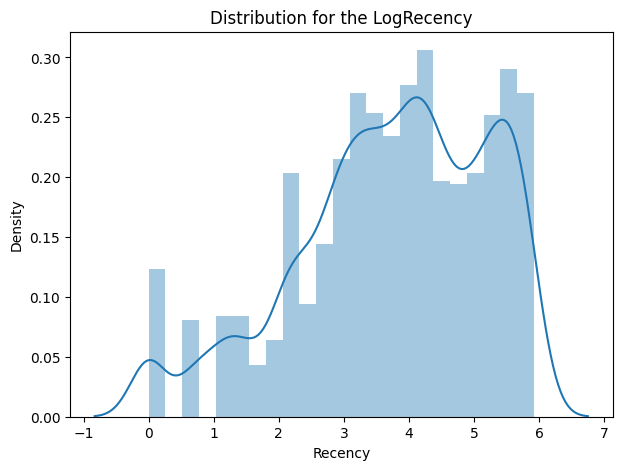

In [62]:
#Distribution of Recency
plt.figure(figsize = (7,5))
sns.distplot(RFMlogData['Recency'])
plt.title('Distribution for the LogRecency')

* Some what normal distribution with **Mean ~ 3.5**

Text(0.5, 1.0, 'Distribution for the LogFrequency')

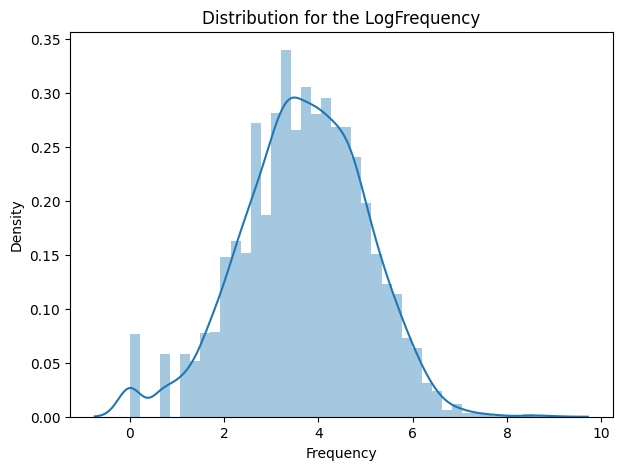

In [63]:
#Distribution of Recency
plt.figure(figsize = (7,5))
sns.distplot(RFMlogData['Frequency'])
plt.title('Distribution for the LogFrequency')

* Some what normal distribution with **Mean ~ 4**

Text(0.5, 1.0, 'Distribution for the LogMonetary')

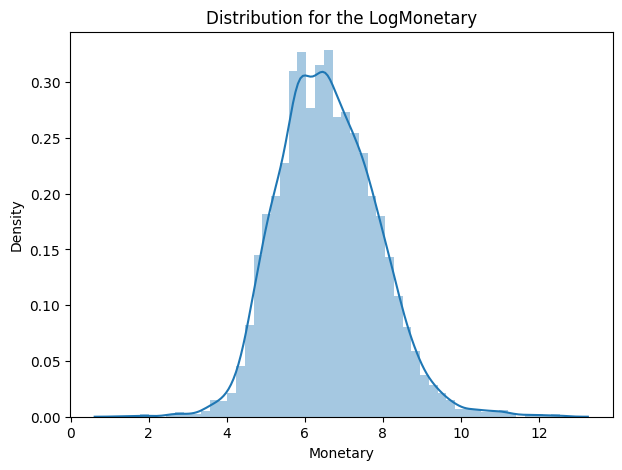

In [64]:
#Distribution of Recency
plt.figure(figsize = (7,5))
sns.distplot(RFMlogData['Monetary'])
plt.title('Distribution for the LogMonetary')

* Some what normal distribution with **Mean ~ 6.5**

In [65]:
#add Log data to the main dataset
import math
RFM_df['LogRecency'] = RFM_df['Recency'].apply(math.log)
RFM_df['LogFrequency'] = RFM_df['Frequency'].apply(math.log)
RFM_df['LogMonetary'] = RFM_df['Monetary'].apply(math.log)

#Dataset after merger
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  LogRecency  LogFrequency  LogMonetary  
CustomerID                                                         
12346.0             Silver    5.783825      0.000000    11.253942  
12347.0          Platinaum    0.693147      5.204007     8.368693  
12348.0               Gold    4.317488      3.433987     7.494007  
12349.0          Platinaum    2.890372      4.290459     7.471676  
12350.0              Bronz    5.736572      2.833213     5.812338

###----------------------------------------------------------------------**Monetary & Recency**---------------------------------------------------------------------

# **MODEL 1 (K-Means Clustring)**

In [72]:
 #importing the dependency for the model
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm


***Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minimum number of clusters required by using Elbow method.***

### Applying Elbow method on the Recency and Monetary

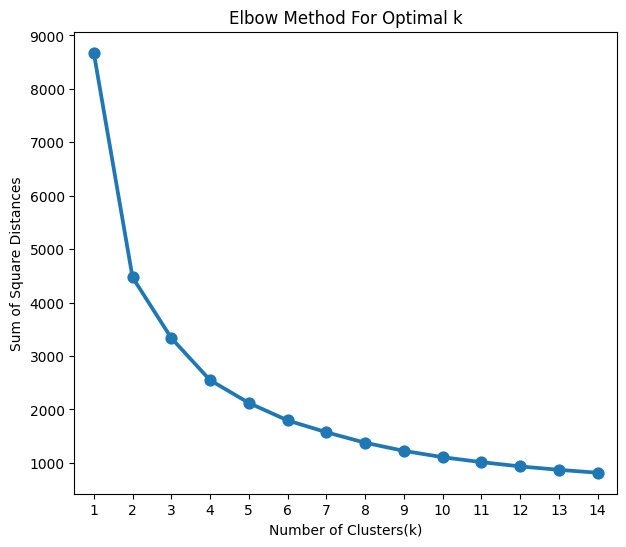

In [67]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['LogRecency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(7,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we can see that Optimal value for cluster came out to be 2.


####Cross verifying with ElbowVisualizar
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

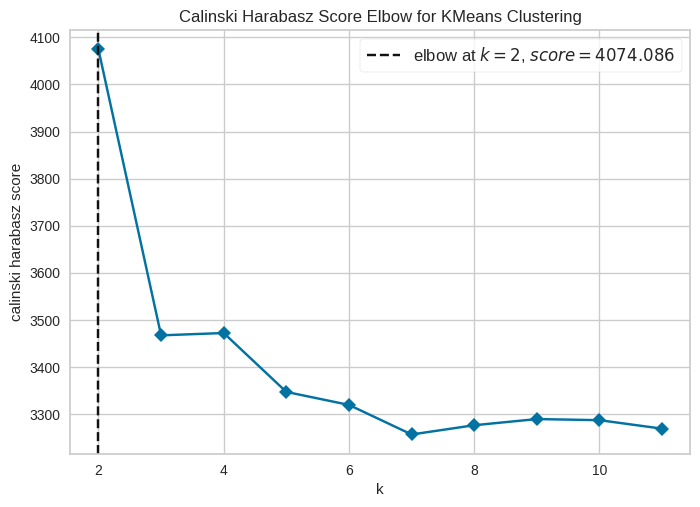

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [68]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)

In [69]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['LogRecency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.421461308316105
For n_clusters = 3, silhouette score is 0.3433470120059089
For n_clusters = 4, silhouette score is 0.3649058771514865
For n_clusters = 5, silhouette score is 0.3395250404488943
For n_clusters = 6, silhouette score is 0.3422201212043055
For n_clusters = 7, silhouette score is 0.34787086356830993
For n_clusters = 8, silhouette score is 0.33774535264866695
For n_clusters = 9, silhouette score is 0.3459604789419575
For n_clusters = 10, silhouette score is 0.3479066146663346
For n_clusters = 11, silhouette score is 0.33753966718471434
For n_clusters = 12, silhouette score is 0.3427273975494072
For n_clusters = 13, silhouette score is 0.34235758342627326
For n_clusters = 14, silhouette score is 0.3376357432302628
For n_clusters = 15, silhouette score is 0.33730368894983076


Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

For n_clusters = 2 The average silhouette_score is : 0.421461308316105
For n_clusters = 3 The average silhouette_score is : 0.3433470120059089
For n_clusters = 4 The average silhouette_score is : 0.3649058771514865
For n_clusters = 5 The average silhouette_score is : 0.3395250404488943
For n_clusters = 6 The average silhouette_score is : 0.3422201212043055
For n_clusters = 7 The average silhouette_score is : 0.34787086356830993
For n_clusters = 8 The average silhouette_score is : 0.33774535264866695
For n_clusters = 9 The average silhouette_score is : 0.3459604789419575
For n_clusters = 10 The average silhouette_score is : 0.3479066146663346


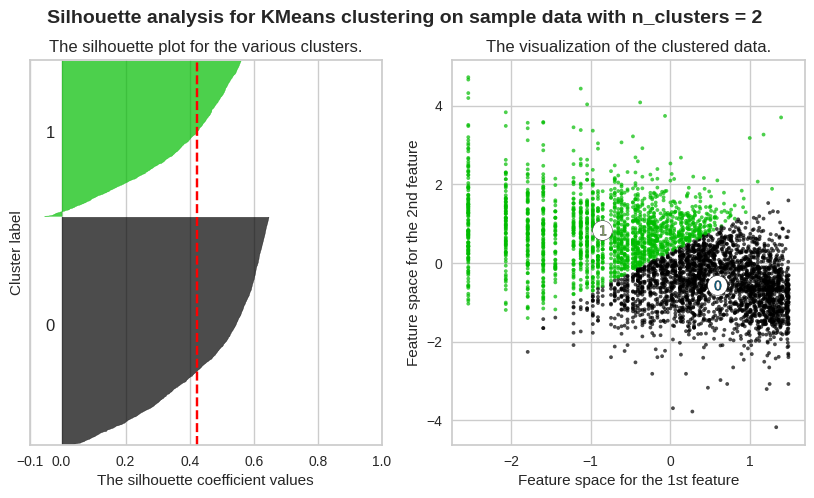

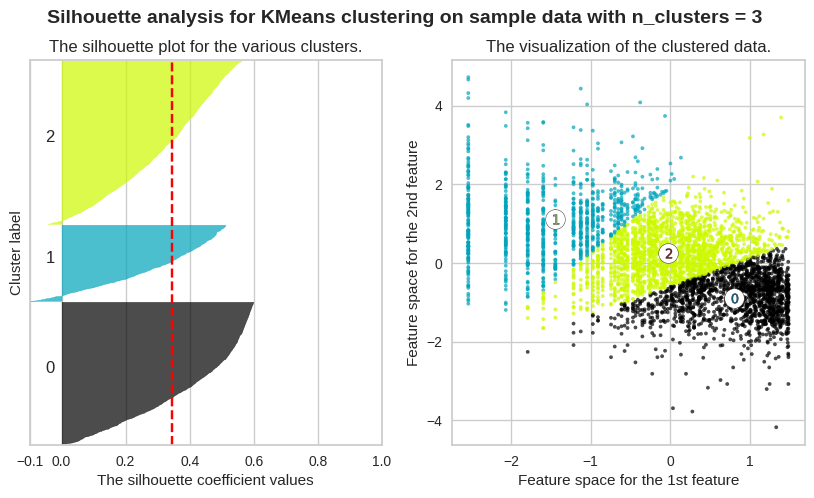

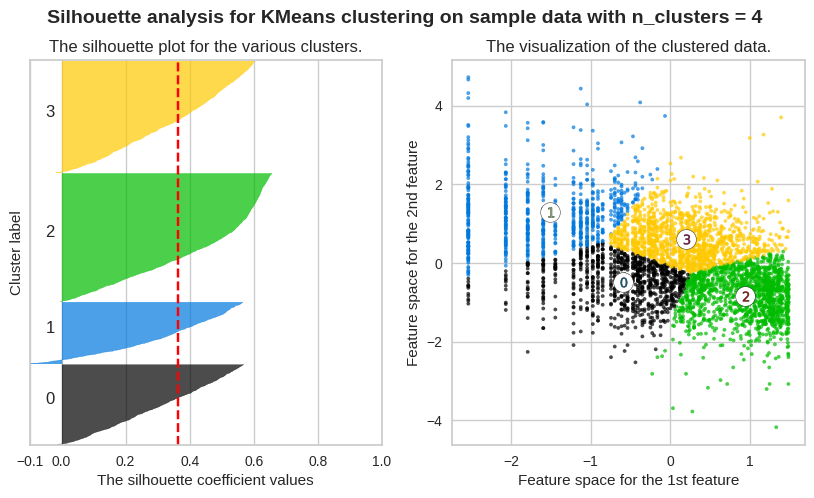

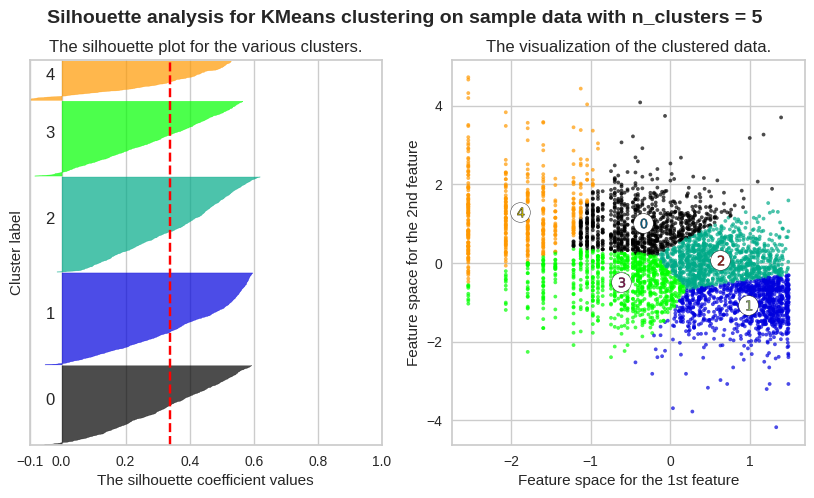

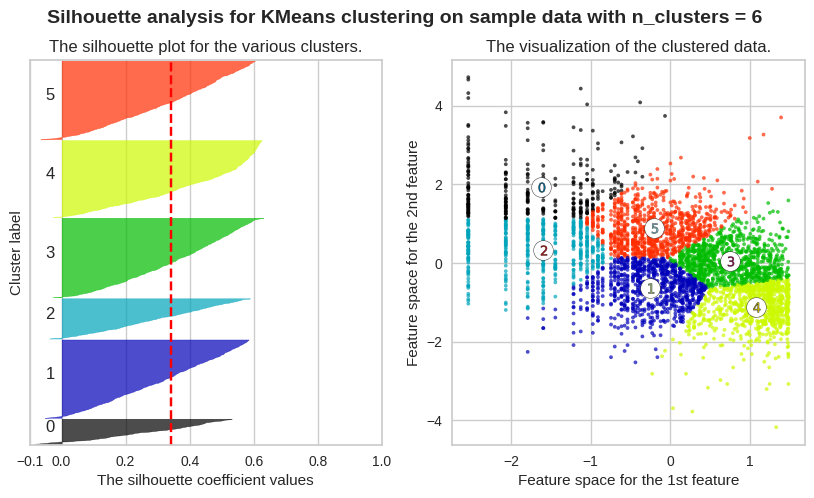

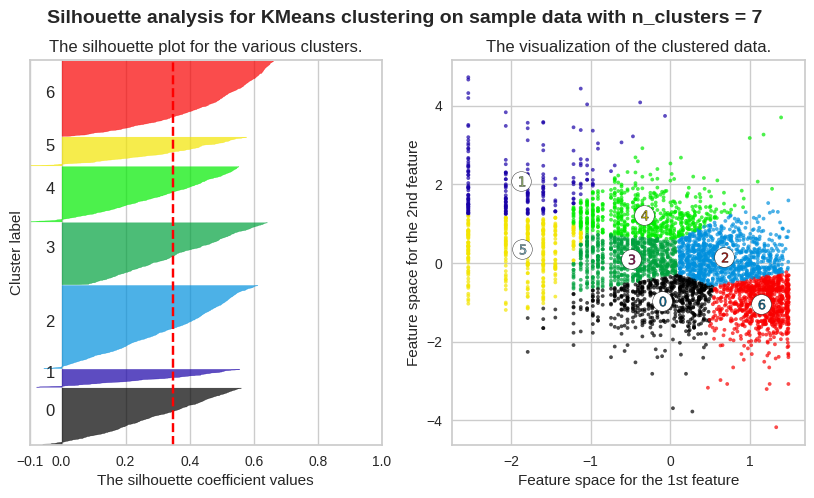

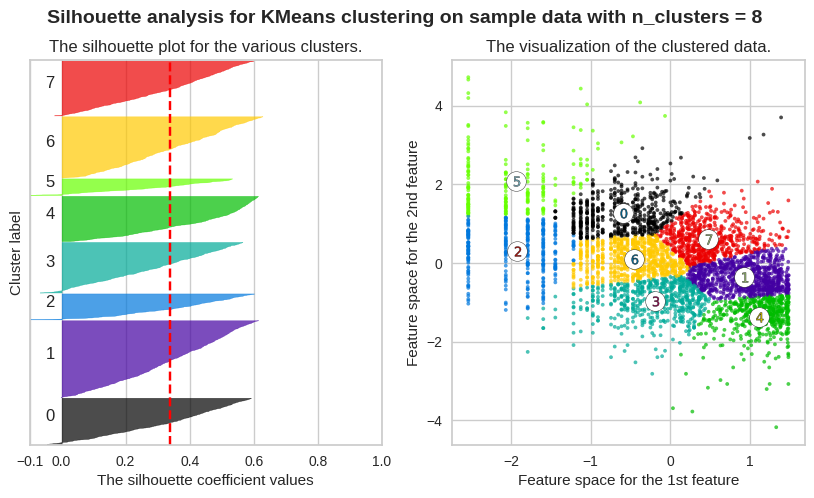

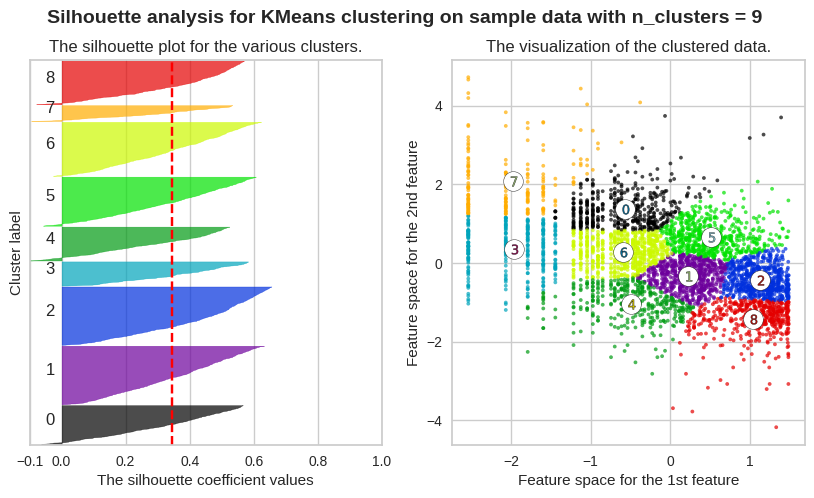

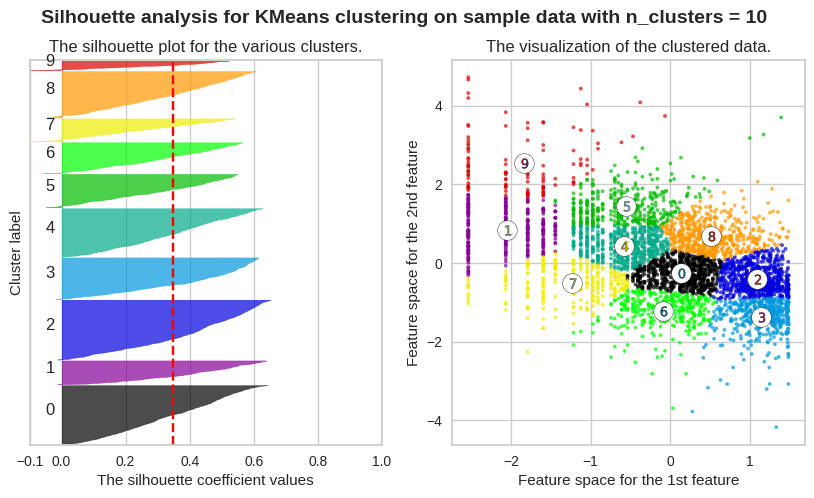

In [76]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **Observations**
We got good Silhouette plot for Cluster-2 but still few datapoints are on the negative side of the Silhouette Coefficient value as shown in below figure. but its better than others.

#### Kmeans Model with Cluster count 2

In [86]:
#Kmeans algorithm with cluster count 2
KmeansModel2 = KMeans(n_clusters = 2)
KmeansModel2.fit(X)
y_predKmeans = KmeansModel2.predict(X)

In [87]:
#Add cluster ID to the dataset to the datapoint from which cluster they belong
RFM_df['ClusterID'] = KmeansModel2.labels_
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  LogRecency  LogFrequency  LogMonetary  ClusterID  
CustomerID                                                                    
12346.0             Silver    5.783825      0.000000    11.253942          0  
12347.0          Platinaum    0.693147      5.204007     8.368693          0  
12348.0               Gold    4.317488      3.433987     7.494007          0  
12349.0          Platinaum    2.890372      4.290459     7.471676          0  
12350.0              Bronz    5.736572      2.833213     5.812338          1

In [88]:
#Find the cluster center to find the intra and inter distance
ClusterCenter = KmeansModel2.cluster_centers_
ClusterCenter

array([[-0.8498825 ,  0.82827704],
       [ 0.58466625, -0.56980304]])

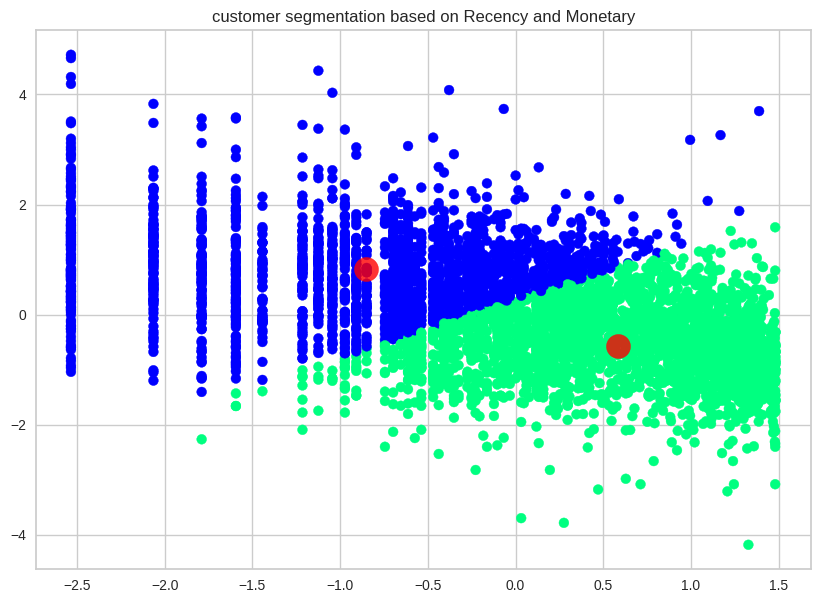

In [92]:
# visualizing the clusters
plt.figure(figsize=(10,7))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_predKmeans, s=50, cmap='winter')

ClusterCenter = KmeansModel2.cluster_centers_
plt.scatter(ClusterCenter[:, 0], ClusterCenter[:, 1], c='red', s=300, alpha=0.8)

# **MODEL 2 (DBSCAN Clustring)**

In [93]:
#Import Dependencies
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [94]:
#eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
DBSCANModel = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(DBSCANModel.labels_, dtype=bool)
core_samples_mask[DBSCANModel.core_sample_indices_] = True
ClusterLabels = DBSCANModel.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(ClusterLabels)) - (1 if -1 in ClusterLabels else 0)
n_noise_ = list(ClusterLabels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, ClusterLabels))

Estimated number of clusters: 2
Estimated number of noise points: 76
Silhouette Coefficient: 0.405


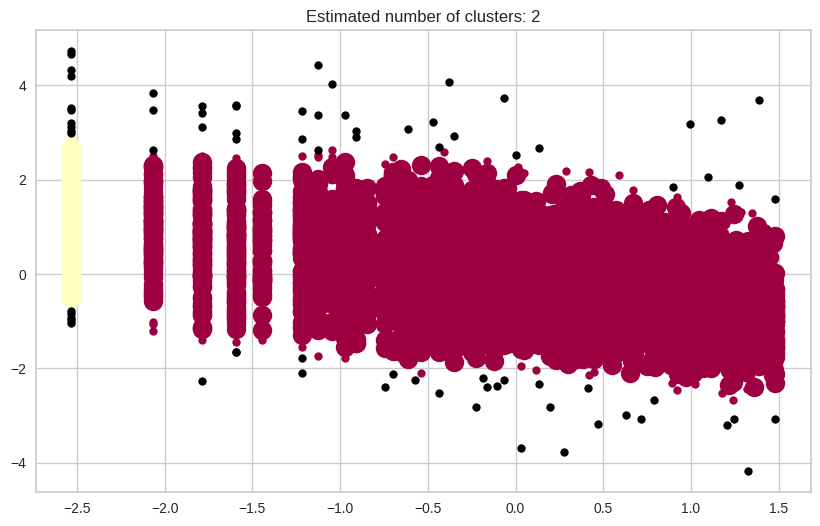

In [96]:
# Black removed and is used for noise instead.
UniqueLabels = set(ClusterLabels)
ClusterColors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(UniqueLabels))]
plt.figure(figsize=(10,6))
for k, col in zip(UniqueLabels, ClusterColors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = ClusterLabels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

#### ----------------------------------------------------------------------**Monetary & Frequency**---------------------------------------------------------------------

# **MODEL 1 (KMeans Clustring)**

#### **Elbow method on Frequency and Monetary**

For getting the optimum number of Culuster for the model.

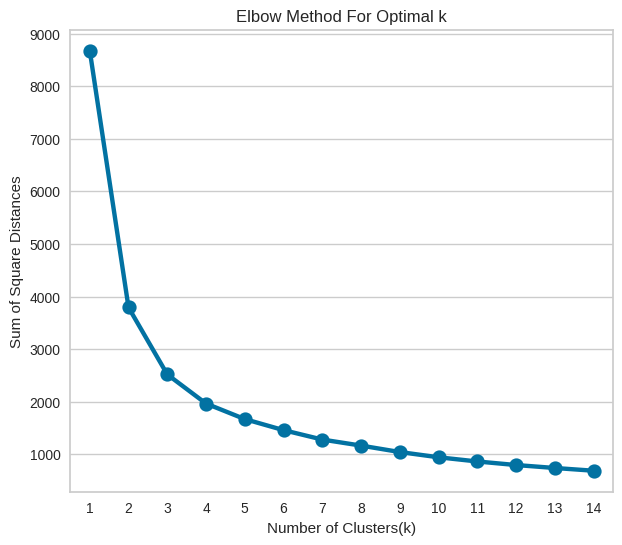

In [99]:
# Applying Elbow method
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['LogFrequency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(7,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Accouring to the above Elbow graph optimum number of **Cluester = 2**

#### **Cross Varyfy with Elbow Visualiser**

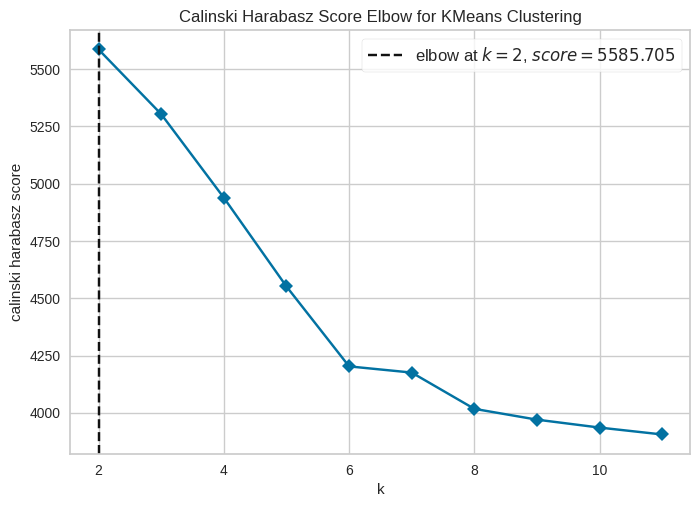

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [101]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**


In [102]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['LogFrequency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.3715810384601166
For n_clusters = 5, silhouette score is 0.3442965607959301
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.34342098057749704
For n_clusters = 8, silhouette score is 0.3500546906243836
For n_clusters = 9, silhouette score is 0.34419928062567495
For n_clusters = 10, silhouette score is 0.36238664926507114
For n_clusters = 11, silhouette score is 0.3682455762844025
For n_clusters = 12, silhouette score is 0.3534862139672636
For n_clusters = 13, silhouette score is 0.36139542577471895
For n_clusters = 14, silhouette score is 0.3486849890768239
For n_clusters = 15, silhouette score is 0.3628225939841498


Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

For n_clusters = 2 The average silhouette_score is : 0.478535709506603
For n_clusters = 3 The average silhouette_score is : 0.40764120562174455
For n_clusters = 4 The average silhouette_score is : 0.3715810384601166
For n_clusters = 5 The average silhouette_score is : 0.3442965607959301
For n_clusters = 6 The average silhouette_score is : 0.3586829219947334
For n_clusters = 7 The average silhouette_score is : 0.34342098057749704
For n_clusters = 8 The average silhouette_score is : 0.3500546906243836
For n_clusters = 9 The average silhouette_score is : 0.34419928062567495
For n_clusters = 10 The average silhouette_score is : 0.36238664926507114


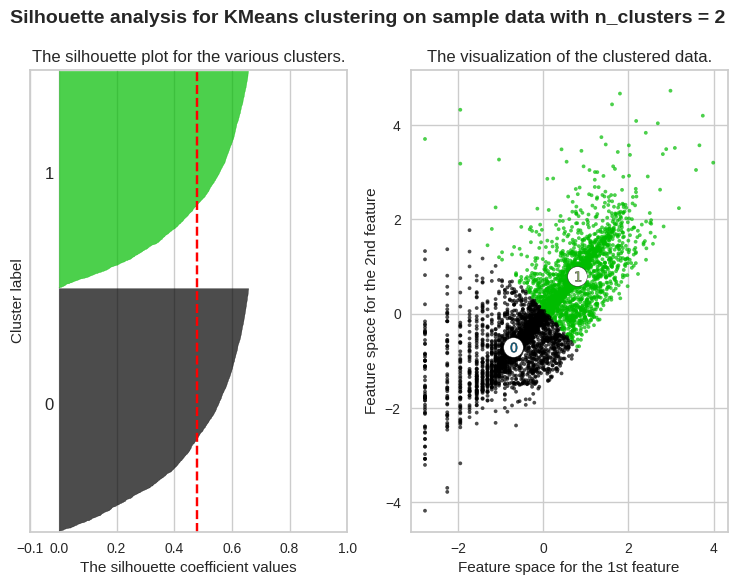

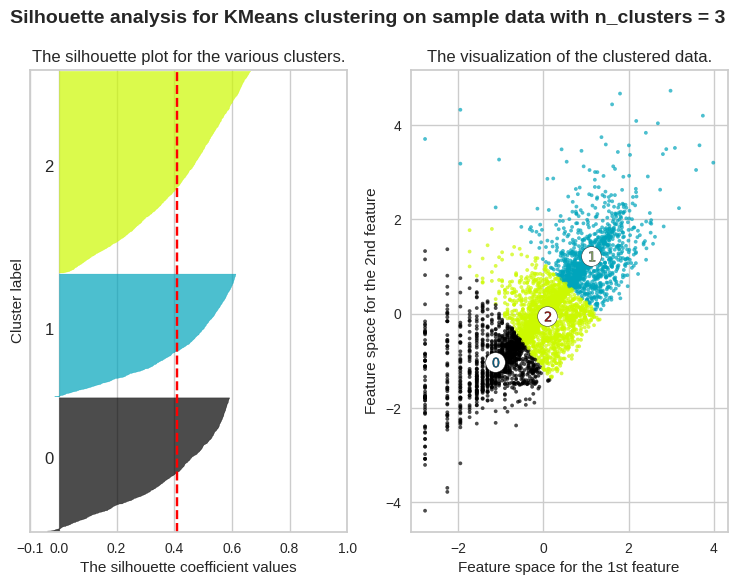

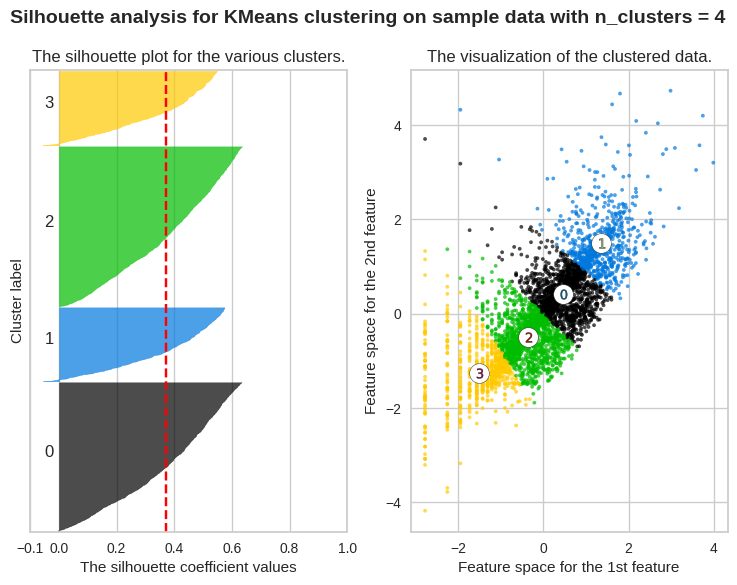

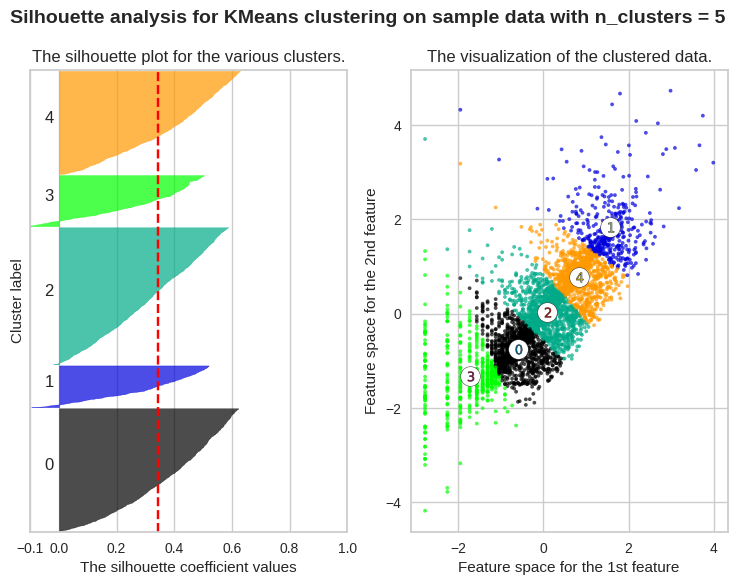

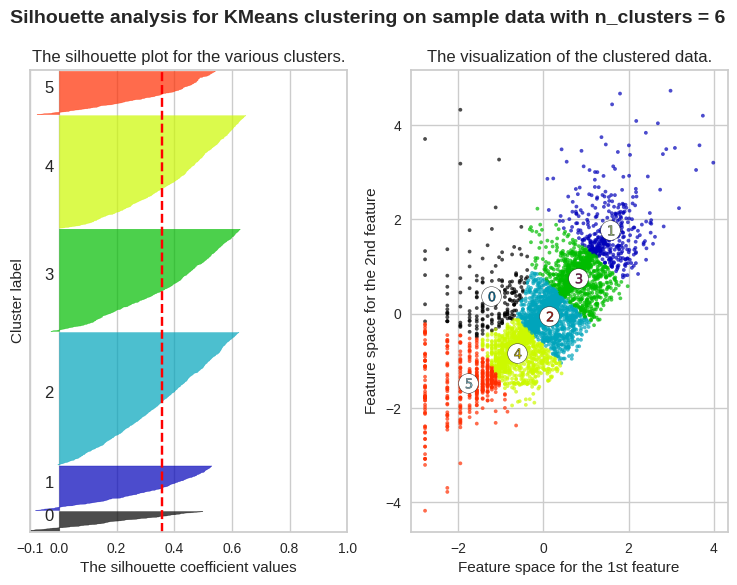

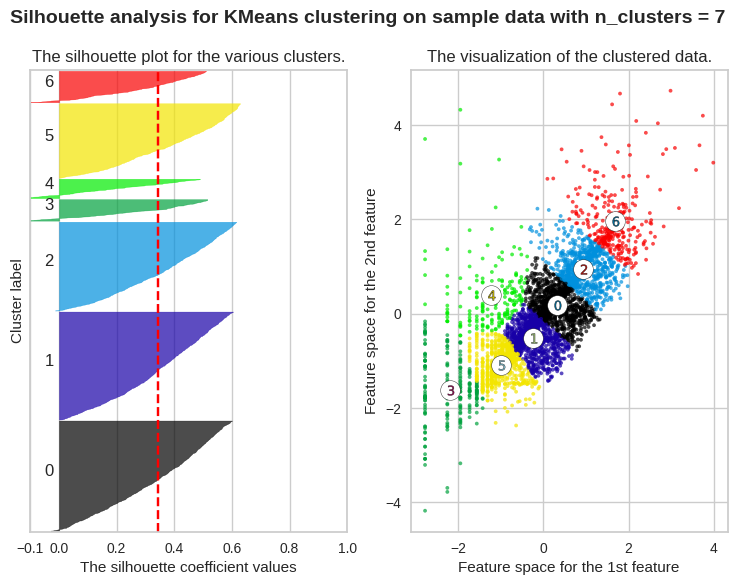

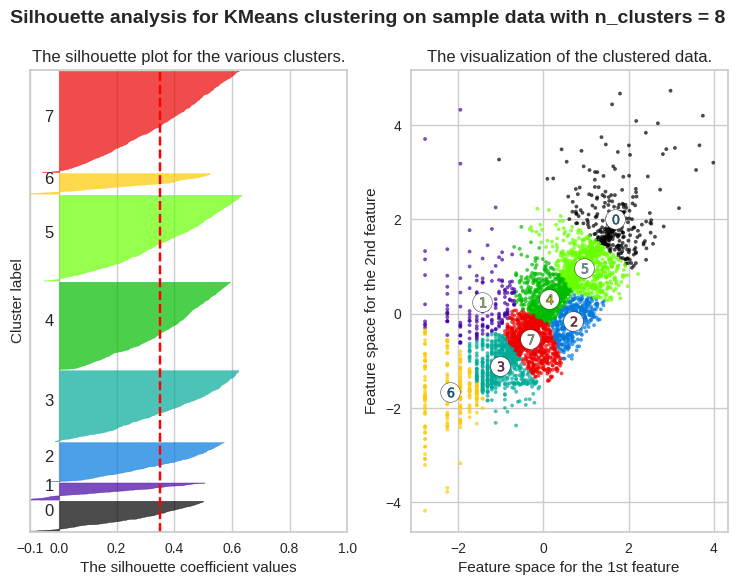

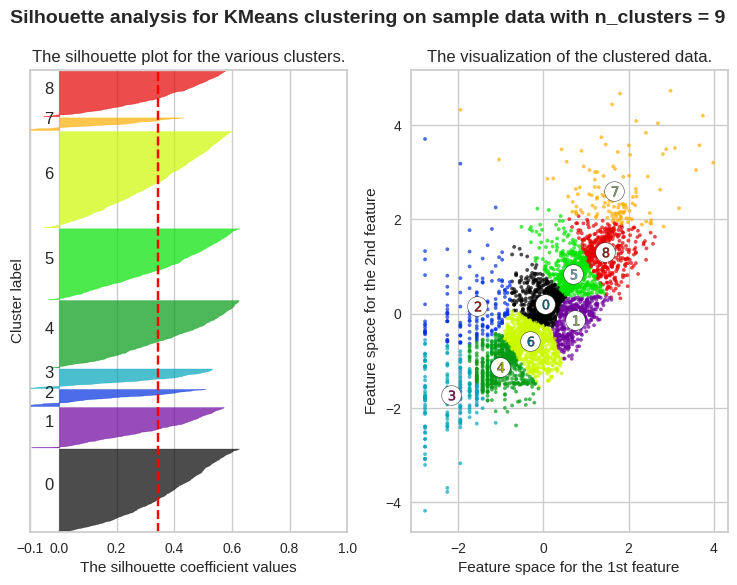

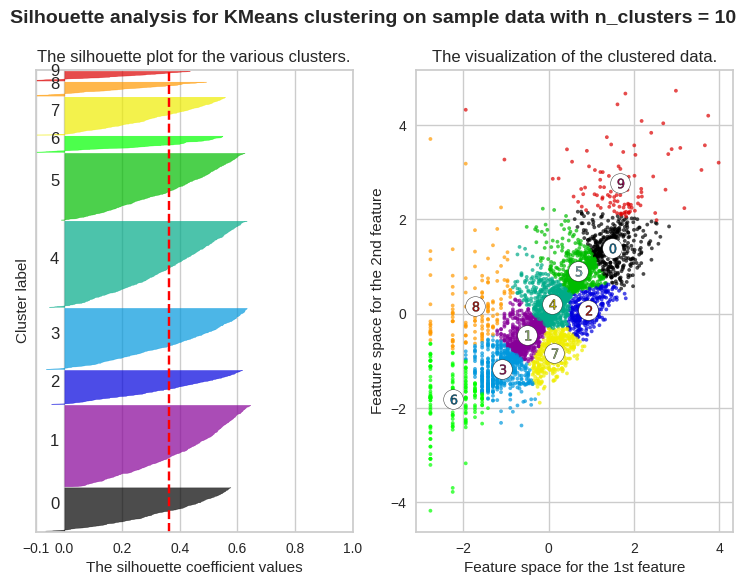

In [104]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* Silhouette Plot for Frequency and Monetary with cluster=2 is very good as compared to Recency and Monetary's Silhouette plot.
* No datapoints are on the negative side of the Silhouette Coefficent values(see First Chart).

**KMeans Model with Cluster Count 2**

In [105]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [106]:
#Find the clusters for the observation given in the dataset
RFM_df['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  LogRecency  LogFrequency  LogMonetary  ClusterID  \
CustomerID                                                                     
12346.0             Silver    5.783825      0.000000    11.253942          0   
12347.0          Platinaum    0.693147      5.204007     8.368693          0   
12348.0               Gold    4.317488      3.433987     7.494007          0   
12349.0          Platinaum    2.890372      4.290459     7.471676          0   
12350.0              Bronz    5.736572      2.833213     5.812338          1   

            Cluster_based_on_freq_mon  
CustomerID                             
12346.0                             0  
12347.0                             0  
12348.0                             0  
12349.0                             0  
12350.0                             1

In [107]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.78953199,  0.79726463],
       [-0.70609673, -0.71301221]])

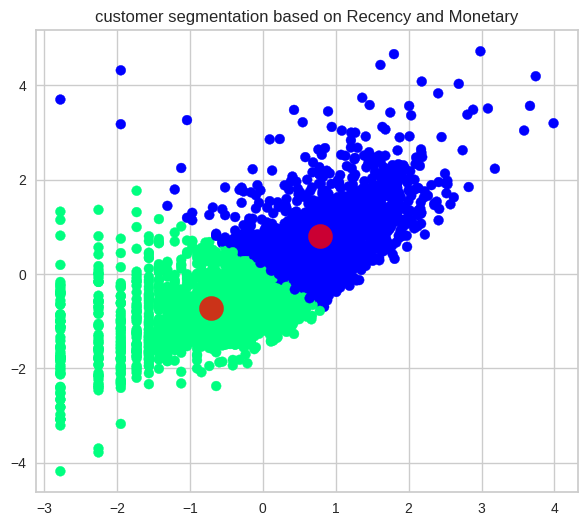

In [110]:
# ploting visualizing the clusters
plt.figure(figsize=(7,6))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **MODEL 2 (DBSCAN Clustring)**

In [111]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


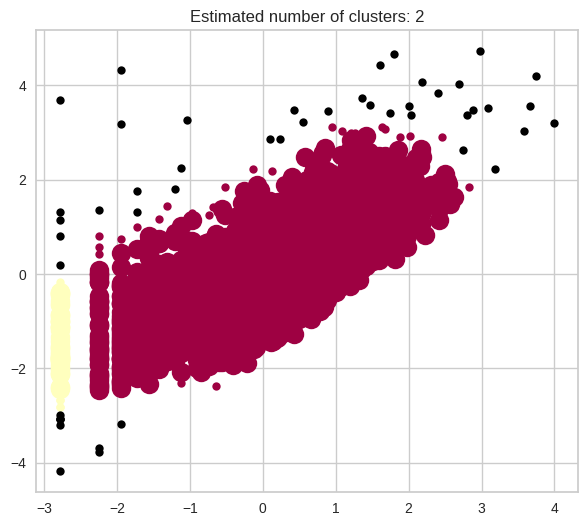

In [113]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(7,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

####----------------------------------------------------------------------Frequency,Monetary & Recency---------------------------------------------------------------------

# **MODEL 1 (KMeans Clustring)**

#### **Elbow Method on Recency, Frequency and Monetary**
**To know the optimum number of cluster for the Model**

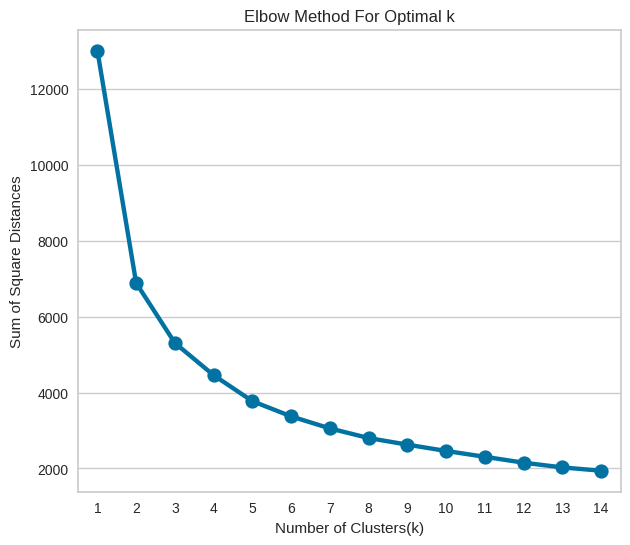

In [116]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['LogRecency','LogFrequency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(7,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we can see that Optimal value for cluster came out to be 2.

#### **Cross verifying with ElbowVisualizar**

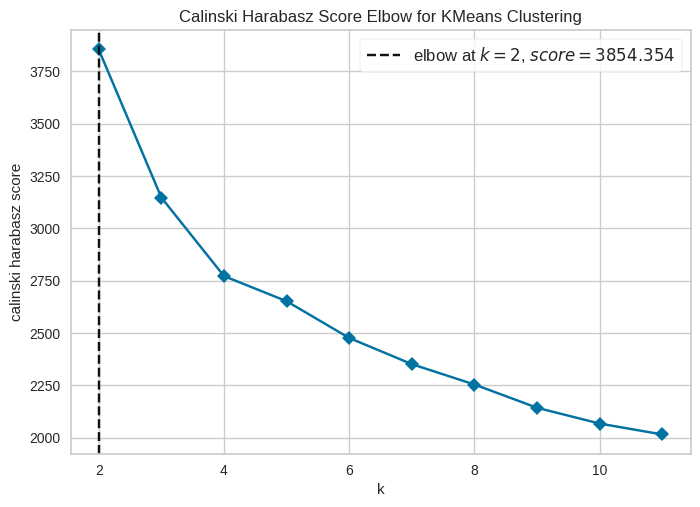

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [118]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [120]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['LogRecency','LogFrequency','LogMonetary']

# taking only values of recency and monetory in X.
X=RFM_df[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39597280345877467
For n_clusters = 3, silhouette score is 0.30306623428198437
For n_clusters = 4, silhouette score is 0.30188282895683416
For n_clusters = 5, silhouette score is 0.2787783127811271
For n_clusters = 6, silhouette score is 0.2789560652501828
For n_clusters = 7, silhouette score is 0.26251570956441783
For n_clusters = 8, silhouette score is 0.26604516508252274
For n_clusters = 9, silhouette score is 0.25334399829461035
For n_clusters = 10, silhouette score is 0.2594507943913136
For n_clusters = 11, silhouette score is 0.261084644577631
For n_clusters = 12, silhouette score is 0.2630954807140074
For n_clusters = 13, silhouette score is 0.2629821003752366
For n_clusters = 14, silhouette score is 0.26165526187324323
For n_clusters = 15, silhouette score is 0.2561927031281945


Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

In [122]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

* Silhouette Plot for Frequency and Monetary with cluster=2 is good.
* Still Few datapoints are on the negative side of the Silhouette Coefficent values(see First Chart). Still we can consider the clusters

**KMeans Model With Cluster Count 2**

In [123]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [124]:
#Find the clusters for the observation given in the dataset
RFM_df['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  LogRecency  LogFrequency  LogMonetary  ClusterID  \
CustomerID                                                                     
12346.0             Silver    5.783825      0.000000    11.253942          0   
12347.0          Platinaum    0.693147      5.204007     8.368693          0   
12348.0               Gold    4.317488      3.433987     7.494007          0   
12349.0          Platinaum    2.890372      4.290459     7.471676          0   
12350.0              Bronz    5.736572      2.833213     5.812338          1   

            Cluster_based_on_freq_mon  Cluster_based_on_freq_mon_rec  
CustomerID                                                            
12346.0                             0                              1  
12347.0                             0                              0  
12348.0                             0                              1  
12349.0                             0                              0  
12350.0                             1                              1

In [125]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[-0.68580838,  0.79910102,  0.80063943],
       [ 0.55327398, -0.6446725 , -0.64591361]])

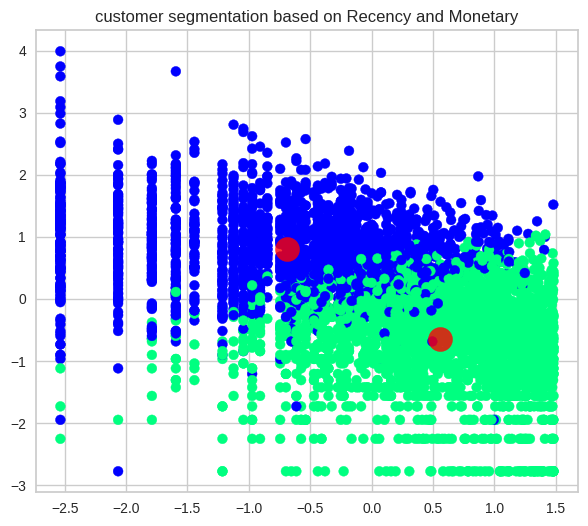

In [127]:
# ploting visualizing the clusters
plt.figure(figsize=(7,6))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **MODEL 2 (DBSCAN Clustring)**

In [128]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 139
Silhouette Coefficient: 0.285


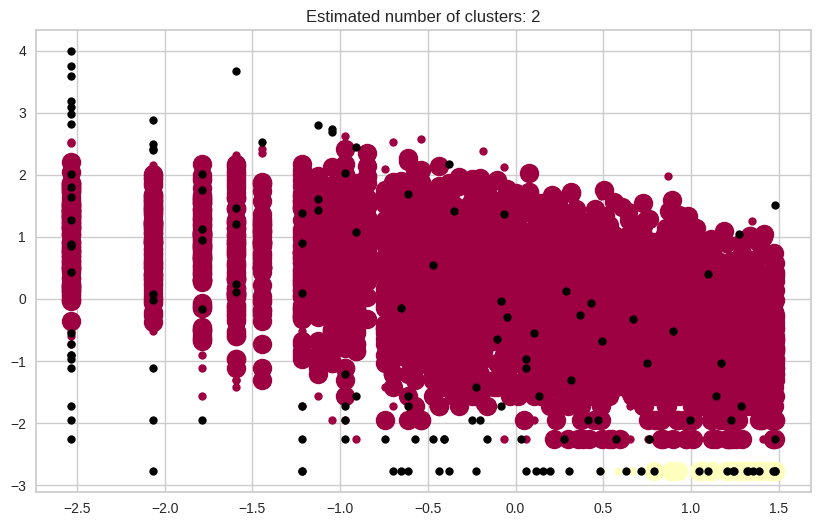

In [131]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()


# **MODEL 3 (Hierarchical Clustering)**

**MODEL for whole data**

#### **How should we Choose the Number of Clusters in Hierarchical Clustering?**
* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

In [132]:
#import dependencies
import scipy.cluster.hierarchy as sch

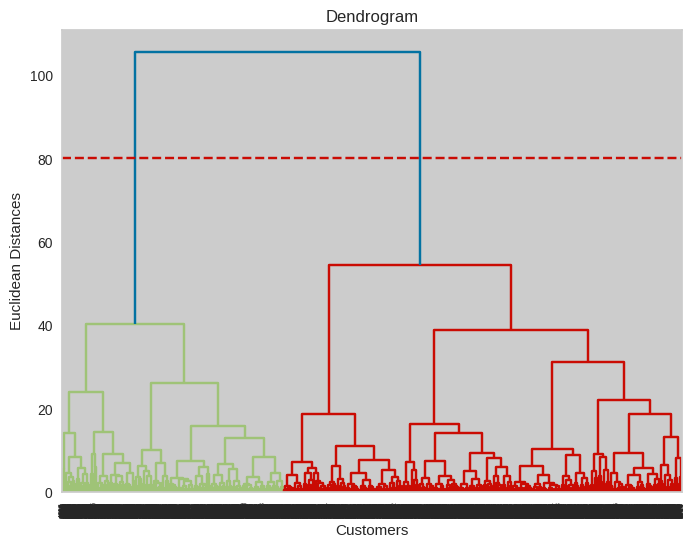

In [134]:
#Visualize the optimum number of cluster
plt.figure(figsize=(8,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

**Hierarchical Cluster Model with cluster count 2**

In [135]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

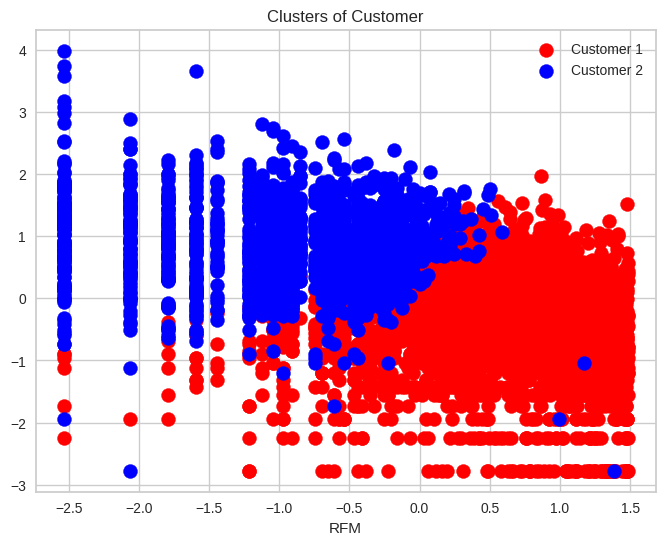

In [137]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [138]:
RFM_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   

           RMFCustomerType  LogRecency  LogFrequency  LogMonetary  ClusterID  \
CustomerID                                                                     
12346.0             Silver    5.783825      0.000000    11.253942          0   
12347.0          Platinaum    0.693147      5.204007     8.368693          0   
12348.0               Gold    4.317488      3.433987     7.494007          0   
12349.0          Platinaum    2.890372      4.290459     7.471676          0   
12350.0              Bronz    5.736572      2.833213     5.812338          1   

            Cluster_based_on_freq_mon  Cluster_based_on_freq_mon_rec  
CustomerID                                                            
12346.0                             0                              1  
12347.0                             0                              0  
12348.0                             0                              1  
12349.0                             0                              0  
12350.0                             1                              1

In [139]:
RFM_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Group',
       'RFM_Score', 'RMFCustomerType', 'LogRecency', 'LogFrequency',
       'LogMonetary', 'ClusterID', 'Cluster_based_on_freq_mon',
       'Cluster_based_on_freq_mon_rec'],
      dtype='object')

In [140]:
NormalisedData = RFM_df[['Recency', 'Frequency', 'Monetary', 'LogRecency', 'LogFrequency','LogMonetary', 'ClusterID', 'Cluster_based_on_freq_mon_rec']]
NormalisedData.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency            \
                                     mean min  max        mean min   max   
Cluster_based_on_freq_mon_rec                                              
0                               30.989632   1  372  175.251944   1  7847   
1                              140.975509   1  373   24.833126   1   157   

                                  Monetary                           
                                      mean     min        max count  
Cluster_based_on_freq_mon_rec                                        
0                              4033.085330  161.03  280206.02  1929  
1                               469.732795    3.75   77183.60  2409

## ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [143]:
# Save the File
import pickle

#Define the file name for the model
filename = 'KMeans_model.pkl'

#Open file in write mode to write the model in it
with open('KMenans_model_saved', 'wb') as file:
  pickle.dump(kmeans_freq_mon_rec, file)

#Close the file i.e.
file.close()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score.
* Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.
* Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.
* Cluster 1 has low recency rate but they are frequent buyers and spends very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business
* Also, we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***